### run metric on footprint of minisurveys

steps

- [get pixIds for each minisurvey](#get-pixIds-for-each-minisurvey)
- [run metric use UserPointSlicer](#run-metric-on-footprints-of-minisurveys)

Minisurveys includes

- 5 deep drilling fields
 
 - DD:COSMOS	proposalId=2, 	RA=150.1,	Dec=2.142726,	pixId=1467	1530
 - DD:ELAISS1	proposalId=3,	RA=9.48,	Dec=-44.0,	pixId=2593	2593
 - DD:ECDFS	    proposalId=4,	RA=53.149817,	Dec=-28.080352,	pixid=2217	2281
 - DD:EDFS		proposalId=5,   RA=61.284445,	Dec=-48.422251,	pixId=2602	2716
 - DD:XMM-LSS	proposalId=6,	RA=35.707074,	Dec=-4.723090,	pixId=1638	1638
  
- Magellanic Clouds
  - Large, RA=80.89375, Dec=-68.243889, size~ 10 degree
  - Small, RA=13.18666, Dec=-71.171389, size~ 5 degree
  
- galactic plane


In [39]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp

then run [utils](#utils) 

### get pixIds for each minisurvey

In [41]:
DBPATH_V1_5 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"
COLS = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
NSIDE = 16

In [43]:
# baseline
dbname =  'baseline_v1.5_10yrs.db'

# get some data from opsim database
df_opsim = get_cols(dbfile=DBPATH_V1_5 + dbname, cols=COLS)

# get healpix Ids
df_opsim = get_pixId(df_opsim, nside=NSIDE)

# in galactic coordinates
df_opsim['fieldGl'], df_opsim['fieldGb'] = radec2gal(ra=df_opsim['fieldRA'].values, dec=df_opsim['fieldDec'].values)



connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps


In [44]:
df_opsim.head(2)

,night,observationStartMJD,fieldRA,fieldDec,filter,proposalId,note,pixId,fieldGl,fieldGb
0,1,59853.985644,294.696105,4.470982,z,0,greedy,1428,42.39422,-8.421518
1,1,59853.986058,297.734708,3.424593,z,1,greedy,1493,42.92609,-11.585333


In [45]:
df_opsim.note.unique()

array(['greedy', 'blob, yy, a', 'blob, yy, b', 'DD:ELAISS1', 'DD:XMM-LSS',
       'DD:EDFS', 'blob, iz, a', 'blob, iz, b', 'blob, zy, a',
       'blob, zy, b', 'blob, ri, a', 'blob, ri, b', 'blob, gr, a',
       'blob, gr, b', 'DD:ECDFS', 'blob, ug, a', 'blob, ug, b',
       'blob, ur, a', 'blob, ur, b', 'DD:COSMOS'], dtype=object)

In [46]:
# get pixIds for five DD fields
pixId_DD_COSMOS =  df_opsim.pixId[ df_opsim.note.str.contains('DD:COSMOS') ].unique() 
pixId_DD_ELAISS1 =  df_opsim.pixId[ df_opsim.note.str.contains('DD:ELAISS1') ].unique() 
pixId_DD_ECDFS = df_opsim.pixId[ df_opsim.note.str.contains('DD:ECDFS') ].unique() 
pixId_DD_EDFS = df_opsim.pixId[ df_opsim.note.str.contains('DD:EDFS') ].unique() 
pixId_DD_XMM_LSS = df_opsim.pixId[ df_opsim.note.str.contains('DD:XMM-LSS') ].unique() 

print(pixId_DD_COSMOS, pixId_DD_ELAISS1, pixId_DD_ECDFS, pixId_DD_EDFS, pixId_DD_XMM_LSS)

[1467 1530] [2593] [2217 2281] [2661 2602 2716 2662] [1638]


#### Magellanic Clouds

##### select as a simple disk

In [8]:
#LMC
center = radec2xyz(ra=80.89375, dec=-68.243889)
radius = np.deg2rad(10/2) 
ipix_LMC_disk = hp.query_disc(NSIDE, center, radius, inclusive=True)

ipix_LMC_disk

array([2860, 2899, 2900, 2901, 2934, 2935, 2936, 2965, 2966, 2967, 2992,
       2993, 2994, 3016])

In [9]:
# SMC
center = radec2xyz(ra=13.18666, dec=-71.171389)
radius = np.deg2rad(5/2) 
ipix_SMC_disk = hp.query_disc(NSIDE, center, radius, inclusive=True)
ipix_SMC_disk

array([2929, 2960, 2961, 2988, 2989, 3012])

##### select by 12  fields give in MCs white paper 

Knut Olsen et al. Mapping the Periphery and Variability of the Magellanic Clouds

In [10]:
# select by 12 fields given in MC white paper

fields_SMC = pd.DataFrame()
fields_SMC['RA'] = [5.606889, 16.568751, 9.777261 ]
fields_SMC['Dec'] = [-73.293784, -72.896888, -70.757693 ]
fields_SMC['pixId'] = RADec2pix(ra=fields_SMC.RA, dec=fields_SMC.Dec, nside=16)

fields_LMC = pd.DataFrame()
fields_LMC['RA'] = [72.000005, 81.777206,91.216696, 
                     76.364237, 84.972540, 93.230817, 
                     71.999949, 79.825808, 87.479642 ]

fields_LMC['Dec'] = [-70.933132, -70.757749, -70.227751,
                    -68.470535, -68.155026, -67.520318,
                    -66.069988, -65.928086, -65.499818 ]
fields_LMC['pixId'] = RADec2pix(ra=fields_LMC.RA, dec=fields_LMC.Dec, nside=16)


In [11]:
fields_SMC

,RA,Dec,pixId
0,5.606889,-73.293784,2988
1,16.568751,-72.896888,2989
2,9.777261,-70.757693,2988


In [12]:
fields_LMC

,RA,Dec,pixId
0,72.000005,-70.933132,2965
1,81.777206,-70.757749,2993
2,91.216696,-70.227751,2967
3,76.364237,-68.470535,2934
4,84.972540,-68.155026,2935
5,93.230817,-67.520318,2936
6,71.999949,-66.069988,2934
7,79.825808,-65.928086,2935
8,87.479642,-65.499818,2900


In [13]:
def get_pixId_inFoV(fields, nside=16, fov=3.5, res=0.1):
    """get pixIds with field 3.5 deg, center (ra, dec), in degree"""
    ra = fields['RA']
    dec = fields['Dec']
    ra = np.arange(ra-fov/2, ra+fov/2, res)
    dec = np.arange(dec-fov/2, dec+fov/2, res)
    
    ra, dec = np.meshgrid(ra, dec)
    
    pixes = RADec2pix(ra=ra, dec=dec, nside=nside)

    return np.unique(pixes)


In [14]:
ipix_LMC = np.unique( np.concatenate ( fields_LMC.apply(get_pixId_inFoV, axis=1, nside=16, res=0.1).values,  ) )
ipix_SMC = np.unique( np.concatenate ( fields_SMC.apply(get_pixId_inFoV, axis=1, nside=16, res=0.1).values,  ) )


In [15]:
fields_LMC['pixId']

0    2965
1    2993
2    2967
3    2934
4    2935
5    2936
6    2934
7    2935
8    2900
Name: pixId, dtype: int64

In [16]:
ipix_LMC

array([2899, 2900, 2901, 2934, 2935, 2936, 2965, 2966, 2967, 2992, 2993,
       2994])

In [17]:
ipix_SMC

array([2960, 2961, 2988, 2989, 3012])

In [18]:
df = pd.read_csv('./data/Fields_nside16.csv')
# LMC, SMC
df['inLMC'] = np.isin(df['pixId'].values, ipix_LMC)
df['inSMC'] = np.isin(df['pixId'].values, ipix_SMC)

df['inLMC_disk'] = np.isin(df['pixId'].values, ipix_LMC_disk)
df['inSMC_disk'] = np.isin(df['pixId'].values, ipix_SMC_disk)

df.head()

,pixId,fieldRa,fieldDec,fieldGl,fieldGb,fieldEl,fieldEb,starDensity_r25,inLMC,inSMC,inLMC_disk,inSMC_disk
0,0,45.0,87.075820,124.642960,24.641921,85.217963,64.413844,0,False,False,False,False
1,1,135.0,87.075820,125.753479,28.655621,94.800547,64.412987,0,False,False,False,False
2,2,225.0,87.075820,121.143387,29.592908,95.668530,68.533082,0,False,False,False,False
3,3,315.0,87.075820,120.187742,25.546039,84.354664,68.534126,0,False,False,False,False
4,4,22.5,84.149733,123.982115,21.356778,77.697559,63.791264,0,False,False,False,False


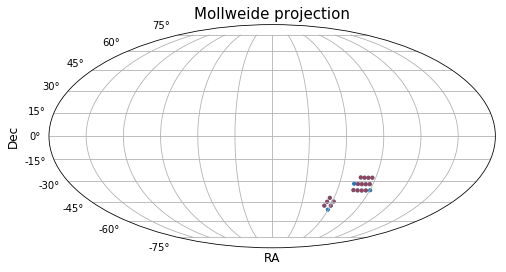

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8),
                            subplot_kw={'projection': 'mollweide'}); 


slicer = ( df['inLMC_disk'] | df['inSMC_disk'])
df_ = df[slicer]

x = df_['fieldGl']
y = df_['fieldGb']
c = np.repeat(0, len(x))
plot_mwd(axs, RA=x, Dec=y, colorbar=False, c=c, s=10, alpha=1, vmax=5, cmap=plt.cm.tab10)



slicer = ( df['inLMC'] | df['inSMC'])
df_ = df[slicer]

x = df_['fieldGl']
y = df_['fieldGb']
c = np.repeat(1.5, len(x))
plot_mwd(axs, RA=x, Dec=y, colorbar=False, c=c, s=10, alpha=0.5, vmax=5, cmap=plt.cm.tab10)

axs.set_xticklabels([]);

#### galactic plane

In [47]:
def getAvoidanceLatitudes(galL, peakDeg=10., taperDeg=80., constWidth=5.):
    
    """Returns the (positive) GP avoidance region for input galactic longitude
    Input:
        galL: in degree
        peakDeg: galaxy peak size
        taperDeg: half width, in degree
        constWidth: in degree
    return 
        val: the positive galaxy b, in degree
    """  
    # The following is adapted from spatialPlotters.py in sims_maf, method _plot_mwZone
    
    # astropy uses 0 <= glon <= 2pi, so we shift the input values accordingly.
    galL = np.radians(galL)
    galL_use = np.copy(galL)
    gSec = np.where(galL_use > np.pi)
    galL_use[gSec] -= 2.0 * np.pi
    
    peakWidth=np.radians(peakDeg)
    taperLength=np.radians(taperDeg)
    val = peakWidth * np.cos(galL_use / taperLength * np.pi / 2.)
    
    # Remove the cosine peak at anticenter
    gFar = np.where(np.abs(galL_use) > taperLength)[0]
    val[gFar] = 0.

    val += np.radians(constWidth)
    
    return np.rad2deg(val)


In [97]:
# define the shape of galactic plane
peakDeg=10.
taperDeg=85
constWidth=5/2

df = pd.read_csv('./data/Fields_nside16.csv')
#df = df_opsim
# get the latitude of galaxy region
df['galaxyb'] = getAvoidanceLatitudes(df['fieldGl'].values, peakDeg, taperDeg, constWidth)

# check if a field is ingalaxy
df['inGP'] = ( df['fieldGb'] >= -df['galaxyb'] ) & ( df['fieldGb'] <= df['galaxyb'] ) 

# get pixId in galactic plane
ipix_GP = df.pixId[df.inGP].unique()



In [99]:
ipix_GP

array([ 144,  145,  146,  147,  179,  180,  181,  182,  183,  184,  217,
        218,  219,  225,  226,  260,  261,  271,  272,  307,  308,  320,
        321,  358,  374,  413,  431,  432,  471,  472,  493,  534,  535,
        558,  598,  599,  622,  661,  662,  687,  725,  726,  751,  788,
        789,  790,  815,  816,  852,  853,  854,  879,  915,  916,  917,
        944,  979,  980,  981, 1008, 1042, 1043, 1044, 1045, 1073, 1107,
       1108, 1109, 1136, 1170, 1171, 1172, 1201, 1234, 1235, 1236, 1237,
       1265, 1297, 1298, 1299, 1300, 1330, 1361, 1362, 1363, 1364, 1393,
       1425, 1426, 1427, 1428, 1458, 1489, 1490, 1491, 1492, 1522, 1552,
       1553, 1554, 1555, 1587, 1616, 1617, 1618, 1619, 1620, 1650, 1679,
       1680, 1681, 1682, 1683, 1715, 1744, 1745, 1746, 1747, 1779, 1807,
       1808, 1809, 1810, 1811, 1843, 1871, 1872, 1873, 1874, 1875, 1907,
       1934, 1935, 1936, 1937, 1938, 1972, 1998, 1999, 2000, 2001, 2002,
       2003, 2036, 2062, 2063, 2064, 2065, 2066, 21

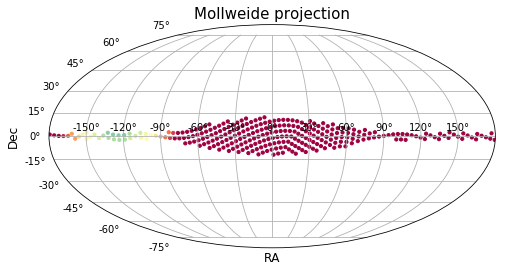

In [98]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6),
                            subplot_kw={'projection': 'mollweide'}); 


slicer = ( df['inGP'] )
df_ = df[slicer]

x = df_['fieldGl']
y = df_['fieldGb']

#x = df_['fieldRa']
#y = df_['fieldDec']
#c = np.repeat(1.5, len(x))
c = df_['pixId'].values
plot_mwd(axs, RA=x, Dec=y, colorbar=False, c=c, s=10, alpha=1, vmax=c.max()*.2, cmap=plt.cm.Spectral_r)

#axs.set_xticklabels([]);

#### plot footprints 

In [36]:
df = df_opsim

# DD fields
df["inDD"] = df['note'].str.contains('DD')

# LMC, SMC
df['inLMC'] = np.isin(df['pixId'].values, ipix_LMC)
df['inSMC'] = np.isin(df['pixId'].values, ipix_SMC)

df['inLMC_disk'] = np.isin(df['pixId'].values, ipix_LMC_disk)
df['inSMC_disk'] = np.isin(df['pixId'].values, ipix_SMC_disk)

df['galaxyb'] = getAvoidanceLatitudes(df['fieldGl'].values, peakDeg, taperDeg, constWidth)
df['ingalaxy'] = ( df['fieldGb'] > -df['galaxyb'] ) & ( df['fieldGb'] < df['galaxyb'] ) 



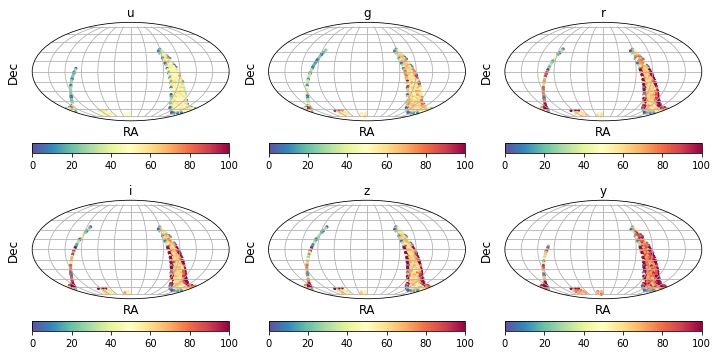

In [37]:

# slice required dataframe 
# Deep drilling

slicer = ( df['night'] < 4000 ) &( df['ingalaxy'] | df['inLMC'] | df['inSMC'])
df_ = df[slicer]
# groupby healpix
bydic = {
    "observationStartMJD": "count",
    "fieldRA" : "mean",
    "fieldDec": "mean",
    "fieldGl" : "min",
    "fieldGb": "min",
}
df_ = df_.groupby(by=['pixId','filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df_, coord='C', figsize=(12, 6), vmax=100, s=5, cmap=plt.cm.Spectral_r)



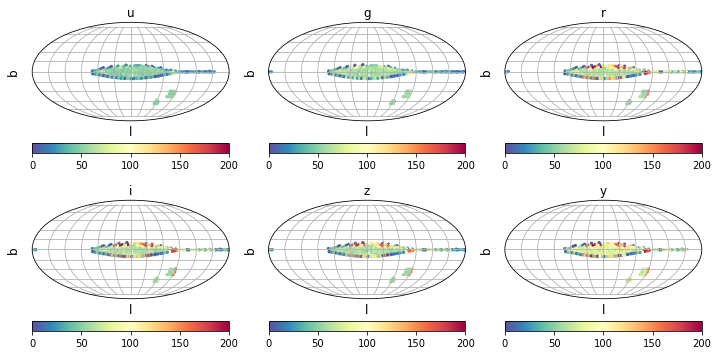

In [38]:
# in galactic plane
plot_filter_Nv(df_, coord='G', figsize=(12, 6), vmax=200, s=5, savefig='figures/footprint_ms.pdf', cmap=plt.cm.Spectral_r)


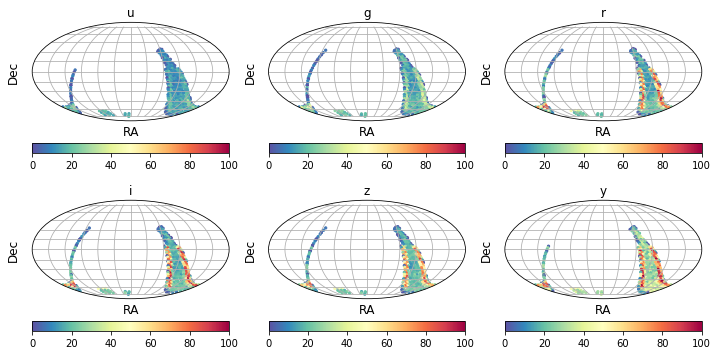

In [127]:

# slice required dataframe 
# Deep drilling

slicer = ( df['night'] < 1000 ) &( df['ingalaxy'] | df['inLMC'] | df['inSMC'])
df_ = df[slicer]
# groupby healpix
bydic = {
    "observationStartMJD": "count",
    "fieldRA" : "mean",
    "fieldDec": "mean",
    "fieldGl" : "min",
    "fieldGb": "min",
}
df_ = df_.groupby(by=['pixId','filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df_, coord='C', figsize=(12, 6), vmax=100, s=5, cmap=plt.cm.Spectral_r)



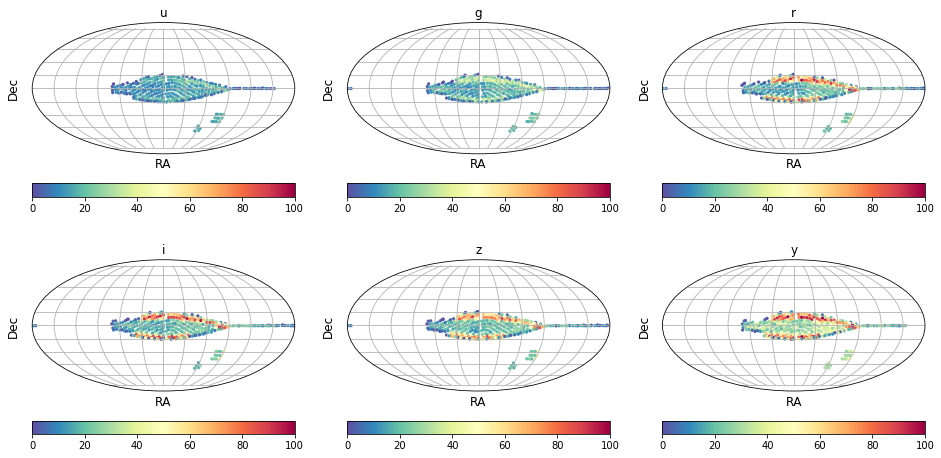

In [129]:
plot_filter_Nv(df_, coord='G', figsize=(16, 8), vmax=100, s=5, cmap=plt.cm.Spectral_r)


### run metric on footprints of minisurveys

In [63]:
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [65]:
# load opsim database
#dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.4/"  # path to all opsim databases
dbpath = DBPATH_V1_5
# connect to opsim database
dbname = 'baseline_v1.5_10yrs.db'
opsdb = db.OpsimDatabase(dbpath+dbname)

# output directory
outDir = 'outDir'
resultsDb = db.ResultsDb(outDir=outDir)


In [66]:
# define metric here
class testMetric(metrics.BaseMetric):
    """simplest metric example"""
    def __init__(self, colname, **kwargs):
        self.colname = colname
        super().__init__(col=colname, metricDtype='float', **kwargs)
        
    def run(self, dataSlice, slicePoint=None):
        
        # method used to compute metric, return a float value for each slicepoint/healpix
        data = dataSlice
        if len(data)!=0:
            result = np.mean(data[self.colname])  
        else:
            result = hp.UNSEEN
        return result


Querying database SummaryAllProps with constraint night<200 for columns ['fieldRA', 'fieldDec', 'airmass']
Found 145354 visits
Running:  ['testMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<200" constraint now.
Plotting complete.


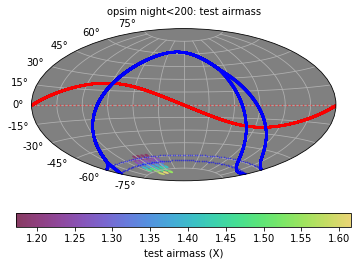

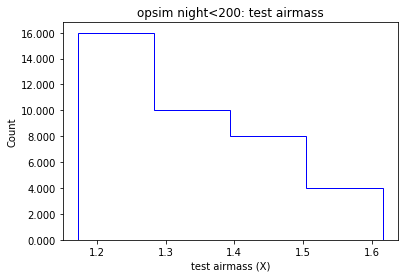

In [77]:

# mini survey pixIds
# for 5 DDFs: pixId_DD_COSMOS, pixId_DD_ELAISS1, pixId_DD_ECDFS, pixId_DD_EDFS, pixId_DD_XMM_LSS
# for MCs: ipix_LMC, ipix_SMC
# for GP: ipix_GP
# to combine surveys: use np.concatenate([ pixId_DD_COSMOS, pixId_DD_ELAISS1, pixId_DD_ECDFS...] )
ipix_ms = ipix_LMC 

# metric, slicer, constraint
metric = testMetric(colname='airmass',)

# use UserPointsSlicer for MS
ra, dec = pix2radec(nside=16, ipix=ipix_ms)
slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True, badval=0)
sqlconstraint = 'night<200'

# bundle
testMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'testMetricSky':testMetricSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


In [68]:
from lsst.sims.utils import _healbin

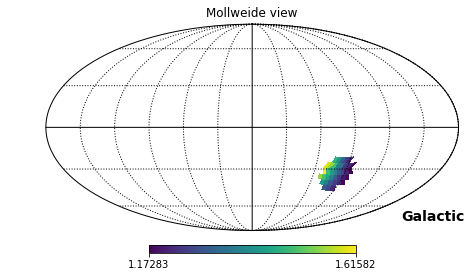

In [79]:
plt.figure(1)
dist = _healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], testMetricSky.metricValues, nside=16)
hp.mollview(dist, fig=1, badcolor='white', coord=['C','G'])
hp.graticule()

### utils

In [40]:
#  get columns from databases
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    import sqlite3
    import pandas as pd
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df

def get_pixId(df, nside=16):
    '''get pixId for each field'''
    pixId = RADec2pix(nside, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df

def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid

def radec2xyz(ra, dec):
    '''convert ra/dec to xyz'''
    theta = 0.5 * np.pi - np.deg2rad(dec)
    phi = np.deg2rad(ra)
    xyz = hp.ang2vec(theta, phi)
    
    return xyz

def radec2gal(ra, dec):
    '''convert from ra/dec to galactic l/b'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=ra, dec=dec, 
                 unit=(u.degree, u.degree))
    
    l = c.galactic.l.degree
    b = c.galactic.b.degree
    return l, b

def gal2radec(gl, gb):
    '''convert gl/gb to ra/dec'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(l=gl, b=gb, frame="galactic",
                unit=(u.degree, u.degree))
    ra = c.icrs.ra.degree
    dec = c.icrs.dec.degree
    return ra, dec


# plot function
# plot skymap

def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmax=None, colorbar=True, coord='C', **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
        
    '''
    import numpy as np
    import matplotlib.pyplot as plt

    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=0, vmax=vmax, **kwargs)  # convert degrees to radians
    # ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    
    if coord=='C':
        ax.set_xlabel("RA")
        ax.set_ylabel("Dec")
    elif coord=='G':
        ax.set_xlabel("l")
        ax.set_ylabel("b")
        
    
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)

def plot_filter_Nv(df, coord='C', figsize= (12, 6), colorbar=True, vmax=None, savefig=None, **kwargs):
    """plot number of visits in 6 filters"""
    
    fig, axs = plt.subplots(2, 3, figsize=figsize,
                            subplot_kw={'projection': 'mollweide'}); 
    axs = axs.ravel()
    FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']
    for i, f in enumerate(FILTERS):
        
        df_f = df[ df['filter']==f ]
        if coord=='G':
            x = df_f['fieldGl'].values
            y = df_f['fieldGb'].values       
        else:
            x = df_f['fieldRA'].values
            y = df_f['fieldDec'].values
        c = df_f['Nv'].values
        if len(c)!=0:
            plot_mwd(axs[i], x, y, c, title=f, colorbar=colorbar, vmax=vmax, coord=coord, **kwargs)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        axs[i].set_title(f)
    if savefig!=None:
        fig.savefig(savefig, bbox_inches='tight')
